## Logistic Regression (Regressión Logística)

La regresión logística es una técnica estadística y de machine learning que se utiliza para clasificar datos, mientras que las regresiones lineales buscan predecir una variable continua **la regresión logística se enfoca en predecir la clase de una variable categórica.**

Por lo tanto forma parte de los modelos de clasificación. Es sencillo de implementar, tiene buen rendimiento cuando las clases son linealmente separables, trabaja mejor con clases binarias y es un modelo probabilístico. 

**La regresión logística mide la probabilidad de que un patrón pertenezca a una clase u otra.**

### Función Logística (Sigmoid)

La función logística, también conocida como **función sigmoidal** (o Sigmoid en inglés) es la función que le da nombre a este clasificador.

Ésta función se define de la siguiente forma:

$$sigmoid(x) = \frac{1}{1 + e^{-x}}$$

Otra forma de definir la función:

$$sigmoid(x) = \frac{e^{x}}{e^{x} + 1}$$

Gráfica de la función sigmoidal:
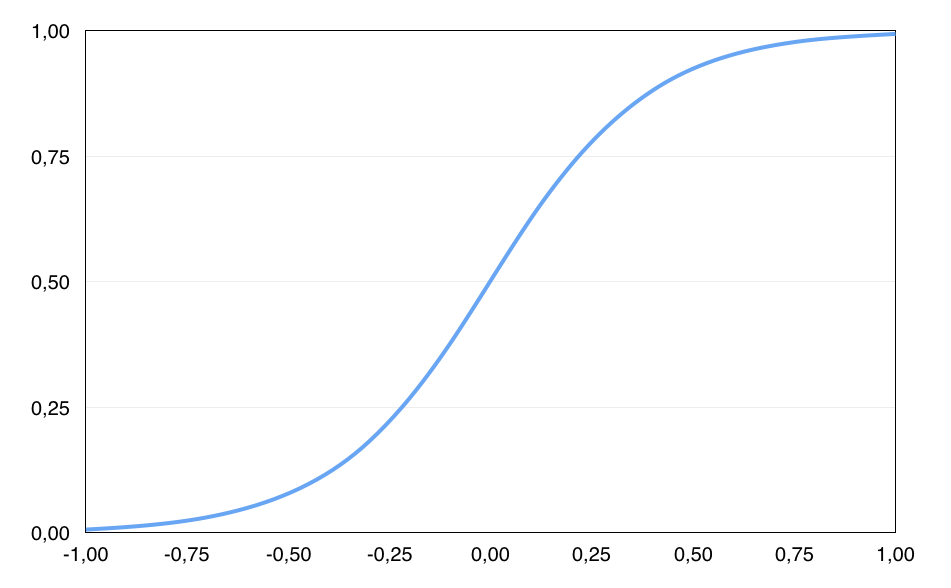


**La función sigmoidal mostrada arriba es la que se usaría si tuviésemos un modelo de una sola característica (atributo).**

Para **modelos multilíneales** el valor de **$x$ será sustituido por una función que se ajuste mejor a los datos de entrenamiento**, dando de esta forma una **variante de la función sigmoidal**, en otras palabras, estaríamos hablando de una función sigmoidal donde **$x$ pasa a ser una función de n-variables (una por cada atributo o columna)**, similar a lo que sucede con las **Regresiones Lineales**.

Para estos casos, la función sigmoidal sería: 

$$sigmoid(x) = \frac{1}{1 + e^{-(w_{0}*x_{0} + w_{1}*x_{1}+...+w_{n})}}$$



**$x$ pasa a ser una ecuación lineal resultado de una regresión lineal que se ajusta lo mejor posible a los datos.**

- El **dominio de esta función son todos los números reales** y el rango o **codominio son los valores entre 0 y 1**, sin incluirlos, es decir, **nunca llegan a ser 0 o 1**.


- La idea detrás de este clasificador es **"transformar"** cada instancia del conjunto de entrenamiento **usando la función sigmoidal**, dando como **resultado un número entre 0 y 1**. Dependiendo del resultado, el clasificador asignará una clase a cada instancia. **Si el resultado es < 0.5 el clasificador lo asignará a la clase 0, si el resultado es > 0.5 el clasificador lo asignará a la clase 1**.


- **La regresión logística es un algoritmo lineal** (con una transformación no lineal en la salida). **Asume una relación lineal entre las variables de entrada con la salida.** Las transformaciones de datos de sus variables de entrada que exponen mejor esta relación lineal pueden dar como **resultado un modelo más preciso**. Por ejemplo, puede usar **log, sqrt, Box-Cox y otras transformaciones** univariadas para exponer mejor esta relación.


- **El modelo puede sobreajustarse (overfitting)** si tiene varias características (atributos) altamente correlacionados. Podemos considerar eliminar las características (atributos) altamente correlacionadas.


- **Es posible que el proceso de estimación de probabilidad esperada que aprende los coeficientes no converja**. Esto puede suceder si hay muchas características altamente correlacionadas o tenemos una matriz **"sparse"** (una matriz con muchos ceros).


_**Documentación:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html_

### **LIBRERÍAS NECESARIAS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Modelo
from sklearn.linear_model import LogisticRegression

In [20]:
iris = datasets.load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

# En esta ocasión vamos a quedarnos con las primeras 2 clases y las dos primeras columnas

### **SEPARACIÓN TRAIN Y TEST**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (70, 2), y_train: (70,)
X_test: (30, 2),  y_test: (30,)


### **PROCESAMIENTO DE DATOS**

In [22]:
# Normalización de datos
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

### **MODELO**

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### **PREDICCIONES**

In [24]:
yhat = model.predict(X_test)

In [25]:
print("Similitud (JACCARD INDEX):", jaccard_score(y_test, yhat, average = "macro"))
print("Exactitud (ACURACY):"    , accuracy_score(y_test, yhat))
print("Precisión (PRECISION):"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad (RECALL):" , recall_score(y_test, yhat, average = "macro"))
print("F1-score (PRECISION + RECALL):"     , f1_score(y_test, yhat, average = "macro"))

Similitud (JACCARD INDEX): 1.0
Exactitud (ACURACY): 1.0
Precisión (PRECISION): 1.0
Sensibilidad (RECALL): 1.0
F1-score (PRECISION + RECALL): 1.0


### **CONFUSION MATRIX**

In [26]:
confusion_matrix(y_test, yhat)

array([[17,  0],
       [ 0, 13]], dtype=int64)

### **Classification Report**

In [27]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        17
           1      1.000     1.000     1.000        13

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



### **Métodos y Atributos del Modelo**

In [28]:
# .predict_proba()

model.predict_proba(X_test)

array([[0.23101355, 0.76898645],
       [0.24351928, 0.75648072],
       [0.38655808, 0.61344192],
       [0.63240817, 0.36759183],
       [0.76905708, 0.23094292],
       [0.66855034, 0.33144966],
       [0.82094896, 0.17905104],
       [0.26734378, 0.73265622],
       [0.67598256, 0.32401744],
       [0.69571503, 0.30428497],
       [0.62677934, 0.37322066],
       [0.66103313, 0.33896687],
       [0.23301718, 0.76698282],
       [0.77694887, 0.22305113],
       [0.31919759, 0.68080241],
       [0.74391363, 0.25608637],
       [0.12025506, 0.87974494],
       [0.16448311, 0.83551689],
       [0.63240817, 0.36759183],
       [0.58888328, 0.41111672],
       [0.32410453, 0.67589547],
       [0.40849319, 0.59150681],
       [0.69332934, 0.30667066],
       [0.77723428, 0.22276572],
       [0.26955205, 0.73044795],
       [0.78082199, 0.21917801],
       [0.71931583, 0.28068417],
       [0.35214301, 0.64785699],
       [0.6350183 , 0.3649817 ],
       [0.14239225, 0.85760775]])

### **Recta que separa las nubes de puntos**

In [29]:
# Ecuación de la recta definida por el modelo

print("RECTA")

print(f"\tCoeficientes: {model.coef_[0]}")

print(f"\tIntercepción: {model.intercept_[0]}")

ecuacion = " ".join(([f"+{coef}*w{num}" if coef >= 0 else f"{coef}*w{num}"\
                      for num, coef in enumerate(np.round(model.coef_[0], 3))]\
                     + [str(np.round(model.intercept_[0], 3))]))

print(f"\tEcuación: {ecuacion}")

print("*"*100)

print("FUNCION SIGMOID")

print(f"\t1 / (1 + e**-({ecuacion}))")

RECTA
	Coeficientes: [ 3.08056432 -2.63213383]
	Intercepción: 0.14036032782644145
	Ecuación: +3.081*w0 -2.632*w1 0.14
****************************************************************************************************
FUNCION SIGMOID
	1 / (1 + e**-(+3.081*w0 -2.632*w1 0.14))


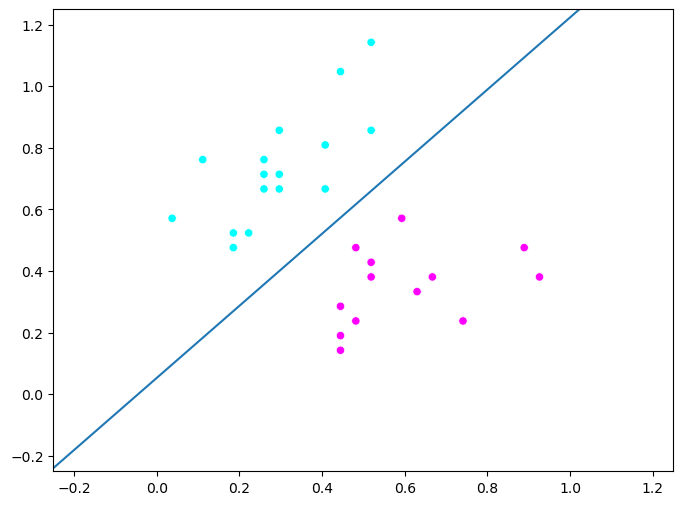

In [32]:
# Gráfico

plt.figure(figsize = (8, 6))

# Puntos de las primeras 2 columnas
sns.scatterplot(x = X_test[:, 0], y = X_test[:, 1], c = y_test, cmap = "cool")

# Recta
x_linspace = np.linspace(-0.25, 1.25, 100)
recta = (model.coef_[0][0]*x_linspace + model.intercept_[0])/(-model.coef_[0][1])

plt.plot(x_linspace, recta)

plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)

plt.show()

### **Representación de yhat y la función Sigmoid**

In [33]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_regression(coef_, intercept_, x):
    recta = np.dot(coef_, x) + intercept_
    
    return sigmoid(recta)

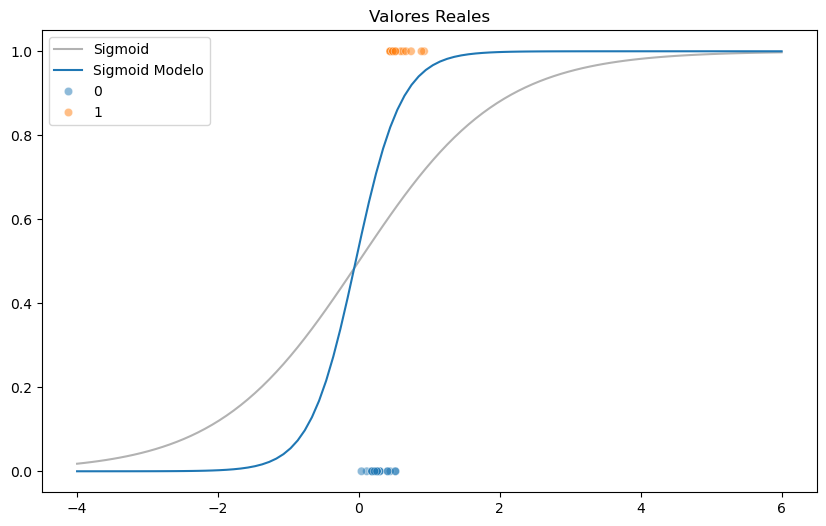

In [34]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-4, 6, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:,0], y = y_test, hue = y_test, alpha = 0.5)

plt.title("Valores Reales")
plt.legend()
plt.show()

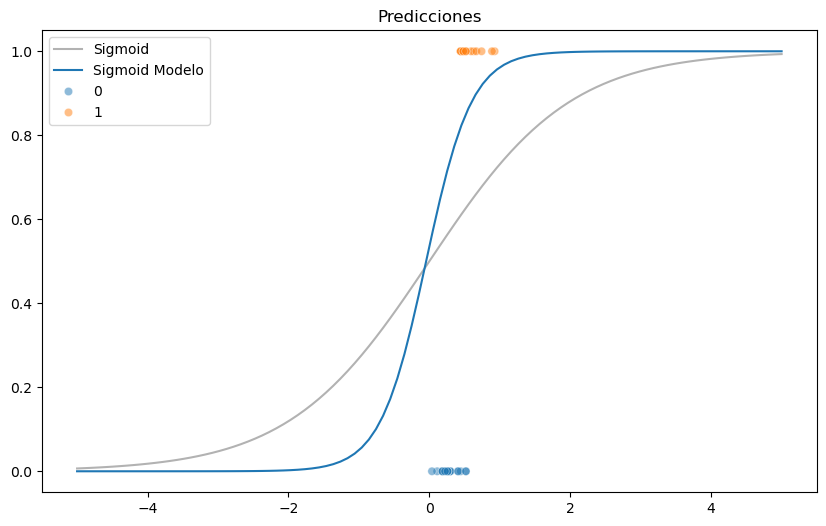

In [35]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-5, 5, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:,0], y = yhat, hue = yhat, color = "orange", alpha = 0.5)

plt.title("Predicciones")
plt.legend()
plt.show()

In [ ]:
################################################################################################################################

### **Ejercicio 1:**
- Utiliza el dataset del titanic para practicar **`LogisticRegression`**:

### **LIBRERÍAS**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express
import plotly.graph_objects as go


# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Modelo
from sklearn.linear_model import LogisticRegression

### **ENTRENAMIENTO Y PREDICCIÓN**

In [39]:
df = pd.read_csv("../Data/titcanica.csv")
backup = df
df.shape

(891, 10)

In [40]:
df["Title"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [42]:
X = np.array(df[['Sex', 'Age', 'Pclass', 'Fare', 'Surname', 'Title']])
y = np.array(df["Survived"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (623, 6), y_train: (623,)
X_test: (268, 6),  y_test: (268,)


In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [44]:
print("Similitud (JACCARD INDEX):", jaccard_score(y_test, yhat, average = "macro"))
print("Exactitud (ACURACY):"    , accuracy_score(y_test, yhat))
print("Precisión (PRECISION):"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad (RECALL):" , recall_score(y_test, yhat, average = "macro"))
print("F1-score (PRECISION + RECALL):"     , f1_score(y_test, yhat, average = "macro"))

Similitud (JACCARD INDEX): 0.6020419847328244
Exactitud (ACURACY): 0.7649253731343284
Precisión (PRECISION): 0.7432228478551112
Sensibilidad (RECALL): 0.7587697628458498
F1-score (PRECISION + RECALL): 0.748236732624547


### **Recta que separa la nube de puntos**

In [45]:
print("RECTA")

print(f"\tCoeficientes: {model.coef_[0]}")

print(f"\tIntercepción: {model.intercept_[0]}")

ecuacion = " ".join(([f"+{coef}*w{num}" if coef >= 0 else f"{coef}*w{num}"\
                      for num, coef in enumerate(np.round(model.coef_[0], 3))]\
                     + [str(np.round(model.intercept_[0], 3))]))

print(f"\tEcuación: {ecuacion}")

print("*"*100)

print("FUNCION SIGMOID")

print(f"\t1 / (1 + e**-({ecuacion}))")

RECTA
	Coeficientes: [-2.66710675e+00 -3.94302750e-02 -9.59336040e-01  2.06424514e-03
 -2.53356454e-01 -1.97478993e-01]
	Intercepción: 5.293698497996951
	Ecuación: -2.667*w0 -0.039*w1 -0.959*w2 +0.002*w3 -0.253*w4 -0.197*w5 5.294
****************************************************************************************************
FUNCION SIGMOID
	1 / (1 + e**-(-2.667*w0 -0.039*w1 -0.959*w2 +0.002*w3 -0.253*w4 -0.197*w5 5.294))


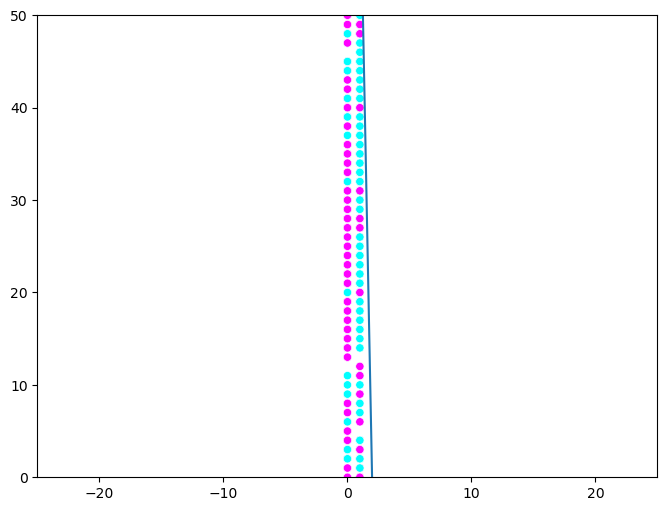

In [46]:
# Gráfico de los datos de las clases que va hacer

plt.figure(figsize = (8, 6))

# Puntos de las primera 2 clases   (columna 1, columna2)
sns.scatterplot(x = X[:, 0], y = X[:, 1], c = y, cmap = "cool")

# Recta                 (rango de los datos de x, puede ser que tengamos que poner otro rango que corresponda en mis datos)
x_linspace = np.linspace(-500, 500, 100)
recta = (model.coef_[0][0]*x_linspace + model.intercept_[0])/(-model.coef_[0][1])

plt.plot(x_linspace, recta)

plt.xlim(-25, 25)
plt.ylim(0, 50)

plt.show()

### **Representación del y_test y la recta Sigmoidal**

In [47]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_regression(coef_, intercept_, x):
    recta = np.dot(coef_, x) + intercept_
    
    return sigmoid(recta)

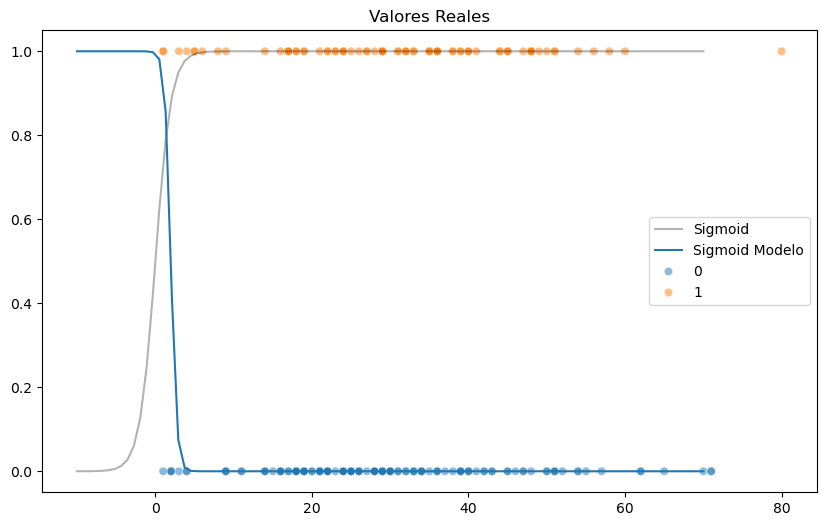

In [48]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-10, 70, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:,1], y = y_test, hue= y_test, alpha = 0.5)

plt.title("Valores Reales")
plt.legend()
plt.show()

### **Representación del y_hat y la recta sigmoidal**

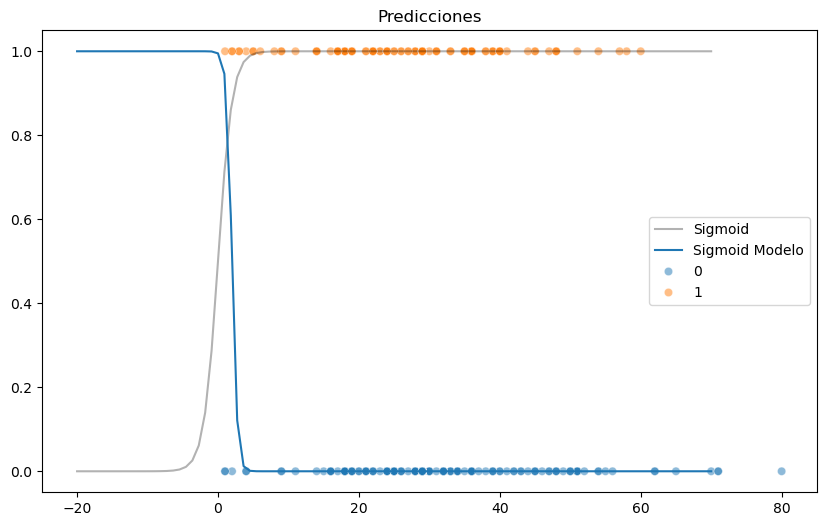

In [49]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-20, 70, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:,1], y = yhat, hue= yhat, color = "orange", alpha = 0.5)

plt.title("Predicciones")
plt.legend()
plt.show()

### **Normalizando datos**

In [50]:
scaler_x = MinMaxScaler()
scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)

# Normalizacion de y_train
scaler_y = MinMaxScaler()
scaler_y.fit(y_train.reshape(-1, 1)) # .reshape(-1, 1) se utiliza para transformar un vector a una matriz
y_train = scaler_y.transform(y_train.reshape(-1,1))

# Normalizacion de X_test
#scaler_x.fit(X_test)
X_test = scaler_x.transform(X_test)

# Normalizacion de y_test
#scaler_y.fit(y_test.reshape(-1, 1)) # .reshape(-1, 1) se utiliza para transformar un vector a una matriz
y_test = scaler_y.transform(y_test.reshape(-1,1))

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

Conjunto de Train: ((623, 6), (623, 1))
Conjunto de Test: ((268, 6), (268, 1))


In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)

print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

print("RECTA")

print(f"\tCoeficientes: {model.coef_[0]}")

print(f"\tIntercepción: {model.intercept_[0]}")

ecuacion = " ".join(([f"+{coef}*w{num}" if coef >= 0 else f"{coef}*w{num}"\
                      for num, coef in enumerate(np.round(model.coef_[0], 3))]\
                     + [str(np.round(model.intercept_[0], 3))]))

print(f"\tEcuación: {ecuacion}")

print("*"*100)

print("FUNCION SIGMOID")

print(f"\t1 / (1 + e**-({ecuacion}))")

Jaccard Index: 0.6099774564676617
Accuracy: 0.7723880597014925
Precisión: 0.7494851426890262
Sensibilidad: 0.7618577075098814
F1-score: 0.7541469283404767
RECTA
	Coeficientes: [-2.63281534 -1.92321568 -1.75260253  0.43170632 -0.39652097 -0.88879424]
	Intercepción: 3.626038094836612
	Ecuación: -2.633*w0 -1.923*w1 -1.753*w2 +0.432*w3 -0.397*w4 -0.889*w5 3.626
****************************************************************************************************
FUNCION SIGMOID
	1 / (1 + e**-(-2.633*w0 -1.923*w1 -1.753*w2 +0.432*w3 -0.397*w4 -0.889*w5 3.626))


C:\Users\Ane Zubieta\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


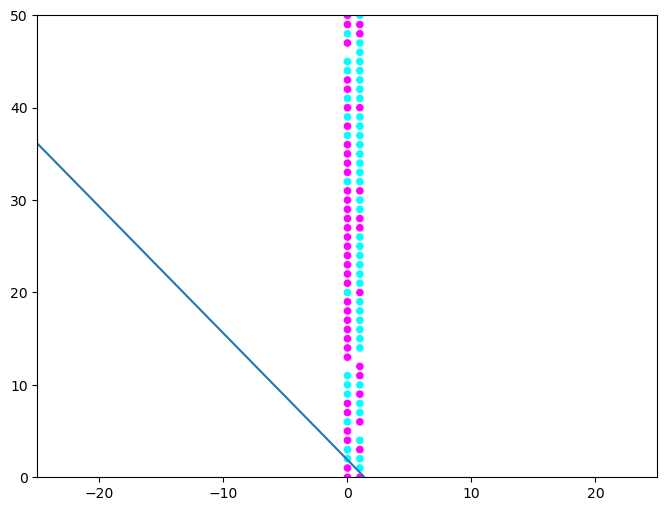

In [52]:
# Gráfico de los datos de las clases que va hacer

plt.figure(figsize = (8, 6))

# Puntos de las primera 2 clases   (columna 1, columna2)
sns.scatterplot(x = X[:, 0], y = X[:, 1], c = y, cmap = "cool")

# Recta                 (rango de los datos de x, puede ser que tengamos que poner otro rango que corresponda en mis datos)
x_linspace = np.linspace(-500, 500, 100)
recta = (model.coef_[0][0]*x_linspace + model.intercept_[0])/(-model.coef_[0][1])

plt.plot(x_linspace, recta)

plt.xlim(-25, 25)
plt.ylim(0, 50)

plt.show()

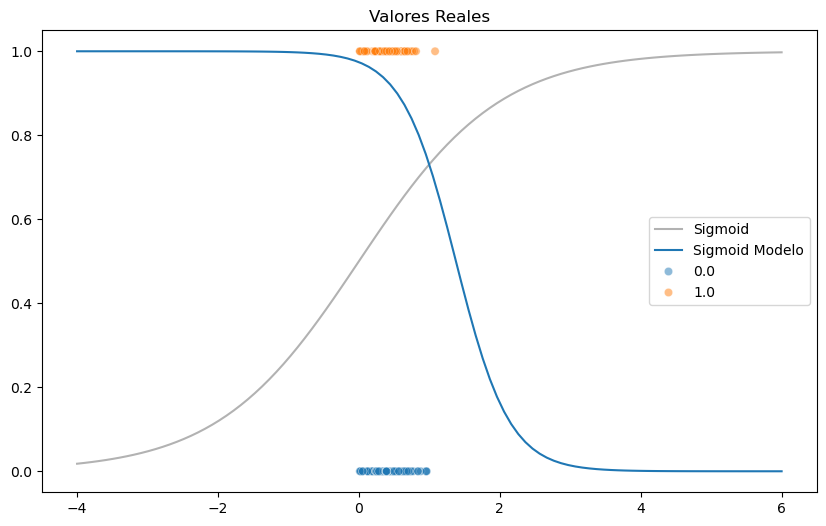

In [53]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-4, 6, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:, 1], y = y_test.flatten(), hue= y_test.flatten(), alpha = 0.5)

plt.title("Valores Reales")
plt.legend()
plt.show()

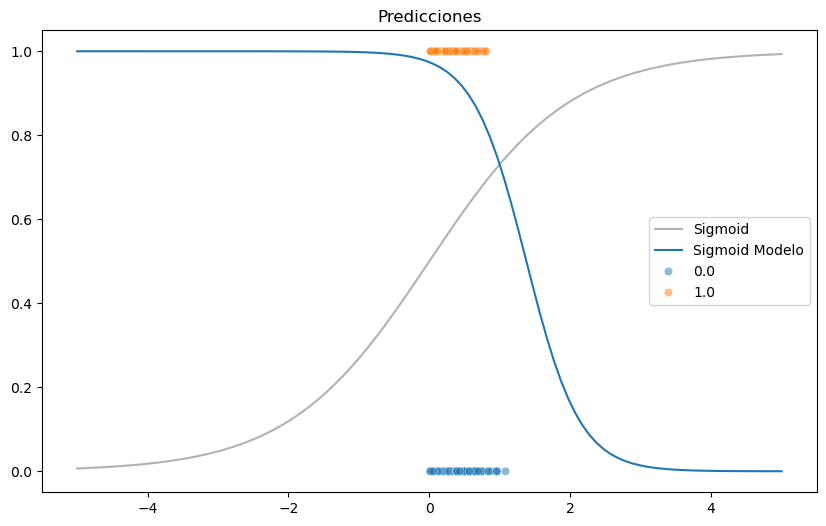

In [54]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-5, 5, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:, 1], y = yhat, hue= yhat, color = "orange", alpha = 0.5)

plt.title("Predicciones")
plt.legend()
plt.show()

In [55]:
colors2 = []
for i in range(len(y_test)):
  if y_test[i] == 0:
    colors2.append('red')
  else:
    colors2.append('blue')

In [56]:
colors = []
for i in range(len(yhat)):
  if yhat[i] == 0:
    colors.append('red')
  else:
    colors.append('blue')

In [57]:
x_linspace = np.linspace(min(X_test[:,0]), max(X_test[:,0]), 100)

curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

In [58]:
fig = plotly.express.scatter_3d(x          = X_test[:,0],
                                y          = X_test[:,1],
                                z          = X_test[:,2],
                                color      = colors2)

fig.show()

In [59]:
fig = plotly.express.scatter_3d(x          = X_test[:,0],
                                y          = X_test[:,1],
                                z          = X_test[:,2],
                                color      = colors)

fig.show()